<a href="https://colab.research.google.com/github/dsi-project5/project-5/blob/master/WebApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
accidents_df_1 = pd.read_csv('./US_Accidents_CleanedUp_Jan26-1.csv.gz')

In [3]:
accidents_df_2 = pd.read_csv('./US_Accidents_CleanedUp_Jan26-2.csv.gz')

In [4]:
accidents_df_3 = pd.read_csv('./US_Accidents_CleanedUp_Jan26-3.csv.gz')

In [5]:
accidents_df_4 = pd.read_csv('./US_Accidents_CleanedUp_Jan26-4.csv.gz')

In [6]:
accidents_df_5 = pd.read_csv('./US_Accidents_CleanedUp_Jan26-5.csv.gz')

/Users/nvijayaraman/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
accidents_df = pd.concat([accidents_df_1, accidents_df_2, accidents_df_3, accidents_df_4, accidents_df_5], axis=0)

In [8]:
accidents_df.head()

,Unnamed: 0,tmc,severity,start_time,end_time,start_lat,start_lng,distance_mi,street,side,...,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_hour,end_hour,month,total_duration
0,0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,I-70 E,R,...,0,0,Night,Night,Night,Night,5,11,2,314.0
1,1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Brice Rd,L,...,0,0,Night,Night,Night,Day,6,6,2,30.0
2,2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,R,...,1,0,Night,Night,Day,Day,6,7,2,30.0
3,3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,R,...,0,0,Night,Day,Day,Day,7,7,2,30.0
4,4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,R,...,1,0,Day,Day,Day,Day,7,8,2,30.0


In [9]:
accidents_df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
state_count = pd.DataFrame(accidents_df.groupby('state')['severity'].agg('count'))

In [20]:
state_count.head()

,severity
state,
AL,56989
AR,5089
AZ,93038
CA,971856
CO,54028


<AxesSubplot:xlabel='state'>

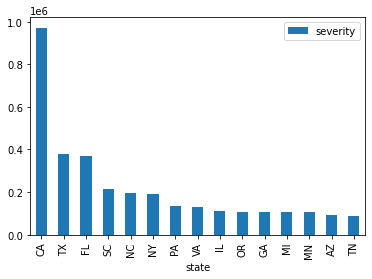

In [22]:
state_count.sort_values(by='severity', ascending=False).head(15).plot(kind='bar')

In [26]:
state_count_df = pd.DataFrame(accidents_df['state'].value_counts().head(15))

<AxesSubplot:>

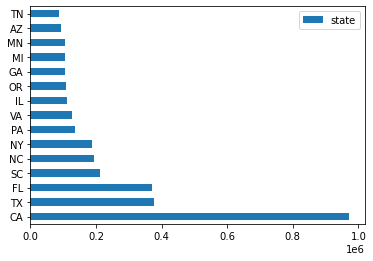

In [28]:
state_count_df.plot(kind='barh')

In [36]:
accidents_df.drop(columns=['Unnamed: 0'], inplace=True)

In [47]:
accidents_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             999999 non-null  int64  
 1   tmc                    999999 non-null  float64
 2   severity               999999 non-null  int64  
 3   start_time             999999 non-null  object 
 4   end_time               999999 non-null  object 
 5   start_lat              999999 non-null  float64
 6   start_lng              999999 non-null  float64
 7   distance_mi            999999 non-null  float64
 8   street                 999999 non-null  object 
 9   side                   999999 non-null  object 
 10  city                   999966 non-null  object 
 11  county                 999999 non-null  object 
 12  state                  999999 non-null  object 
 13  zipcode                999839 non-null  object 
 14  country                999999 non-nu

In [38]:
pd.set_option('display.max_columns', 150)

In [39]:
pd.set_option('display.max_rows', 500)

In [40]:
accidents_df.isnull().sum()

tmc                          0
severity                     0
start_time                   0
end_time                     0
start_lat                    0
start_lng                    0
distance_mi                  0
street                       0
side                         0
city                       137
county                       0
state                        0
zipcode                   1291
country                      0
temperature_f                0
wind_chill_f                 0
humidity_                    0
pressure_in                  0
visibility_mi                0
wind_direction           83496
precipitation_in             0
weather_condition            0
amenity                      0
bump                         0
crossing                     0
give_way                     0
junction                     0
no_exit                      0
railway                      0
roundabout                   0
station                      0
stop                         0
traffic_

In [41]:
accidents_df.groupby('state')['severity'].count().sort_values(ascending=False)

state
CA    971856
TX    376282
FL    369559
SC    212573
NC    193331
NY    189393
PA    135909
VA    127774
IL    111692
OR    108242
GA    107071
MI    105726
MN    105362
AZ     93038
TN     88428
LA     80485
WA     74694
OH     73148
MD     69859
NJ     69116
OK     64870
UT     57983
AL     56989
CO     54028
MA     44114
MO     40132
IN     38098
CT     32488
NE     25005
KY     24707
WI     21519
IA     14186
RI     12909
NV     12021
KS      9728
NH      8559
MS      8052
DE      6907
DC      6505
NM      6455
AR      5089
ID      4237
WV      3612
MT      3342
ME      2346
VT       771
WY       521
ND       464
SD       219
Name: severity, dtype: int64

In [42]:
accidents_ca_df = accidents_df.loc[accidents_df['state'] == 'CA', :]

In [43]:
accidents_ca_df.to_csv('./CA_Accidents_CleanedUp_Jan26.csv')